### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn import metrics

from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV

In [3]:
import warnings
warnings.filterwarnings('ignore')

**Load Train data and Production data**

In [4]:
df_train = pd.read_csv(r"data\Telco-Customer-Churn.csv")

**View and Analyze the data to perform required Preprocessing steps**

In [5]:
# Detecting duplicates
df_train.duplicated().sum()

0

In [6]:
df_train.shape

(7043, 21)

In [7]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dataset Description

1. customerID - Customer ID
2. gender - Whether the customer is a male or a female
3. SeniorCitizen - Whether the customer is a senior citizen or not (1 - yes, 0 - No)
4. Partner - Whether the customer has a partner or not (Yes, No)
5. Dependents - Whether the customer has dependents or not (Yes, No) 
6. tenure - Number of months the customer has stayed with the company
7. PhoneService - Whether the customer has a phone service or not (Yes, No)
8. MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract - The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges - The amount charged to the customer monthly
20. TotalCharges - The total amount charged to the customer

21. Churn - Whether the customer churned or not (Yes or No)

In [8]:
df_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data Cleaning

In [9]:
# Dropping 'customerID' column from data frame as it is not required for the prediction
df_train = df_train.drop('customerID',axis=1)

In [10]:
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')
df_train['MonthlyCharges'] = pd.to_numeric(df_train['MonthlyCharges'], errors='coerce')

In [12]:
df_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Detecting and handling null values from train data

In [13]:
# print(df_train.info())

In [14]:
for col, val in zip(df_train.isna().sum().index, df_train.isna().sum()):
    if val>0:
        print(col, val)
    else:
        print (f'{col} has {val} null values')

gender has 0 null values
SeniorCitizen has 0 null values
Partner has 0 null values
Dependents has 0 null values
tenure has 0 null values
PhoneService has 0 null values
MultipleLines has 0 null values
InternetService has 0 null values
OnlineSecurity has 0 null values
OnlineBackup has 0 null values
DeviceProtection has 0 null values
TechSupport has 0 null values
StreamingTV has 0 null values
StreamingMovies has 0 null values
Contract has 0 null values
PaperlessBilling has 0 null values
PaymentMethod has 0 null values
MonthlyCharges has 0 null values
TotalCharges 11
Churn has 0 null values


In [15]:
df_train['TotalCharges'] = df_train['TotalCharges'].fillna(df_train['TotalCharges'].median())

In [16]:
df_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df_train['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

* The features 'TotalCharges' and 'MonthlyCharges' are converted to float
* From the above analysis for 'TotalCharges' feature, the missing values are very less.
* Imputing the missing values in 'TotalCharges' feature with median value.

In [18]:
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
ohe_data = df_train[['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'PaperlessBilling', 'PaymentMethod', 'gender', 'Contract']]

def One_Hot_Encoder(df):
    ohe = OneHotEncoder(sparse=False)
    train_data = pd.DataFrame()
    for name in df.columns:
#         print(name)
        df_ohe = ohe.fit_transform(df[[name]])
        df_hot_encoded = pd.DataFrame(df_ohe, index=df.index)
#         print(df_hot_encoded)
        df_hot_encoded.columns = ohe.get_feature_names([name])
#         print(df_hot_encoded)
        train_data = pd.concat([train_data, df_hot_encoded], axis=1)
    return train_data

In [20]:
for name in ohe_data.columns:
    print (ohe_data[name].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Female' 'Male']
['Month-to-month' 'One year' 'Two year']


In [21]:
ohe_data_encoded = One_Hot_Encoder(ohe_data)

In [22]:
ohe_data_encoded.shape

(7043, 41)

In [23]:
ohe_data_encoded.columns

Index(['Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'

In [24]:
df_train = df_train.drop(ohe_data, axis=1)

In [25]:
df_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes


In [26]:
train_data = pd.concat([ohe_data_encoded, df_train], axis=1)

In [27]:
train_data.shape

(7043, 46)

In [28]:
#Converting 'Churn' column values, 1 - yes and 0 - no
train_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
train_data['Churn'].replace(to_replace='No', value=0, inplace=True)

In [29]:
train_data.head()

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0,1,29.85,29.85,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0,34,56.95,1889.50,0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0,2,53.85,108.15,1
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0,45,42.30,1840.75,0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0,2,70.70,151.65,1


In [30]:
#dropping churn column as it is dependent variable and will not be used in data preprocessing
#df_train2 = df_train.drop('Churn',axis=1)
#df_train2.dtypes

### Detecting and handling outliers

In [31]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in columns:
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    IQR = q3-q1
    min_Value = q1-1.5*IQR
    max_Value = q3+1.5*IQR

    outliers = []
    for i in train_data[col]:
        #print(i)
        if i< min_Value or i>max_Value:
            outliers.append(i)
    print(f"Outliers in {col}:",outliers)


Outliers in tenure: []
Outliers in MonthlyCharges: []
Outliers in TotalCharges: []


* There are no outliers in the dataset

# Data Visualization

In [32]:
import matplotlib.pyplot as plt

In [33]:
def dist_box_plot(variable_name, color):
    fig, ax = plt.subplots(1,2)
    sns.set(rc={'figure.figsize':(15,5)})
    sns.boxplot(train_data[variable_name], ax=ax[0], color=color).set(title=variable_name +' - Boxplot')
    sns.distplot(train_data[variable_name], bins=20, ax=ax[1], color=color).set(title=variable_name +' - Distribution plot')
    plt.show()

In [34]:
# plt.figure(figsize=(15,5))
# plt.subplot(1, 2, 1)
# plt.plot(history_train.history['loss'], label='train_loss')
# plt.plot(history_train.history['loss'], label='test_loss')
# plt.xticks([0,1,2,3,4], labels = ['1','2','3','4','5'])
# plt.legend(['train_loss', 'test_loss'], loc='upper right')
# plt.title('Model Losses')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.grid()

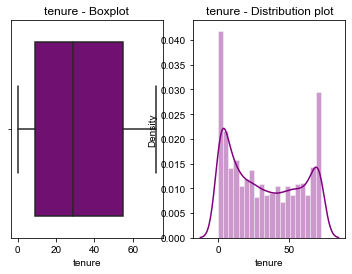

In [35]:
dist_box_plot('tenure', 'purple')

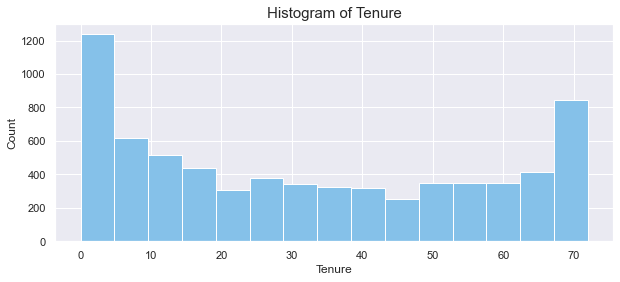

In [36]:
plt.figure(figsize=(10,4))
plt.hist(train_data['tenure'], color = '#85C1E9', bins = 15)
plt.title('Histogram of Tenure',fontsize = 15)
plt.xlabel('Tenure', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

In [37]:
train_data['tenure'].mean()

32.37114865824223

In [38]:
train_data['tenure'].median()

29.0

* From the above distribution graphs, we can say that the 'tenure' variable in data doesn't have outliers.

In [39]:
print("Mean:",train_data['MonthlyCharges'].mean(),"\nMedian:",train_data['MonthlyCharges'].median())

Mean: 64.76169246059922 
Median: 70.35


*From the above analysis we can say the Monthly_charges variable doesn't have outliers

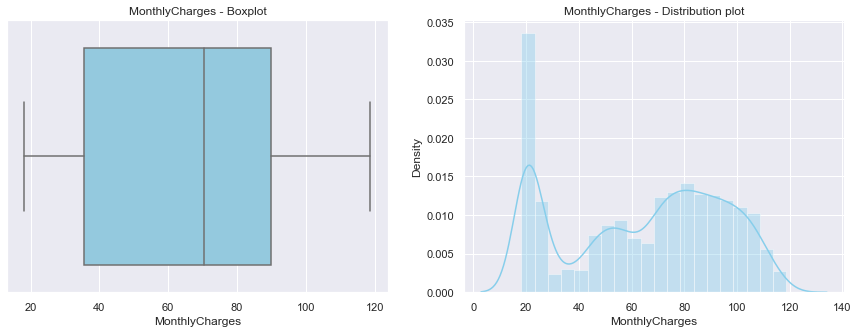

In [40]:
dist_box_plot('MonthlyCharges', 'skyblue')

In [41]:
print("Mean:",train_data['TotalCharges'].mean(),"\nMedian:",train_data['TotalCharges'].median())

Mean: 2281.9169281556187 
Median: 1397.475


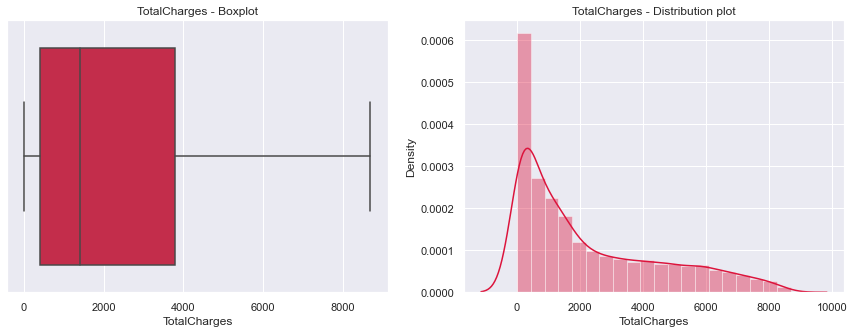

In [42]:
dist_box_plot('TotalCharges', 'crimson')

# Exploratory Data Analysis - EDA

<AxesSubplot:>

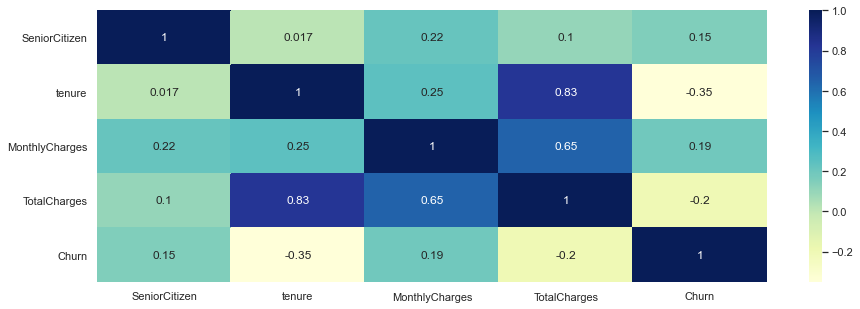

In [43]:
# Correlation between numerical values using HeatMap
corr_variables = train_data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
corr = sns.heatmap(corr_variables.corr(),annot=True,cmap="YlGnBu")
corr

#### From the above correlation heatmap
* We can say that the correlation between Churn and MonthlyCharges is 0.19 indicating there is weak positive relationship between these variables. If there is a unit increase in MonthlyCharges, there is 19% increase in the churn rate.
* Correlation between tenure and churn is -0.35, indicating weak negative relationship. Decrease in the tenure leads to loss of customers by 35%.
* Total Charges and Tenure have a strong positive correlation (0.83) meaning increasing the tenure will increase the cost also.

<AxesSubplot:xlabel='Churn', ylabel='count'>

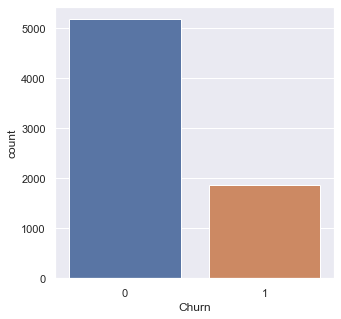

In [44]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(data = train_data, x= 'Churn')

From above barplot 
* The customer churn rate is less in comparison with the customers who stay

<AxesSubplot:xlabel='gender', ylabel='count'>

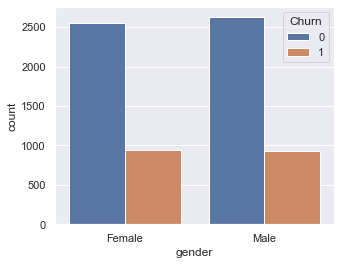

In [45]:
a1 = ohe_data[['gender']]
a2 = train_data[['Churn']]
plotting = pd.concat([a1, a2], axis=1)
sns.set(rc={'figure.figsize':(5,4)})
sns.countplot(data = plotting, x= 'gender',hue="Churn")

* From above plot, we can interpret that there isn't much variation in the data. 'gender' does not have any significant relationship with the churn rate.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

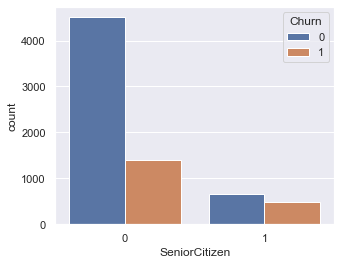

In [46]:
# a1 = train_data[['SeniorCitizen']]
# a2 = train_data[['Churn']]
# plotting = pd.concat([a1, a2], axis=1)
sns.set(rc={'figure.figsize':(5,4)})
sns.countplot(data=train_data,x='SeniorCitizen',hue='Churn')

* The percentage of customers who are senior citizens is very less compared to youth subscripton.

<AxesSubplot:title={'center':'With Dependents'}, xlabel='Dependents', ylabel='count'>

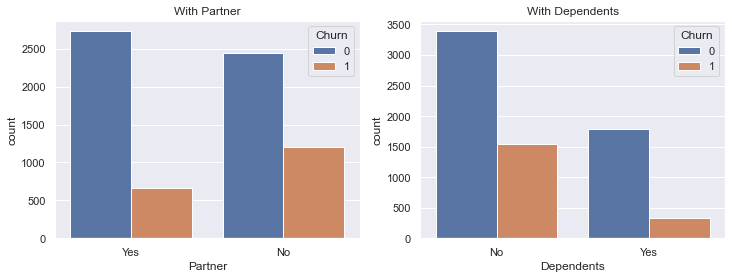

In [47]:
a1 = ohe_data[['Partner', 'Dependents']]
a2 = train_data[['Churn']]
plotting = pd.concat([a1, a2], axis=1)
figure, axis = plt.subplots(1,2,figsize=(12,4))
axis[0].set_title('With Partner')
axis[1].set_title('With Dependents')
sns.countplot(data=plotting,x='Partner',hue='Churn',ax=axis[0],)
sns.countplot(data=plotting,x='Dependents',hue='Churn',ax=axis[1])

* The customers with partners tend to churn more than the customers who have dependents.
* Customers who do not have any partners churn more when compared to those who have partners.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

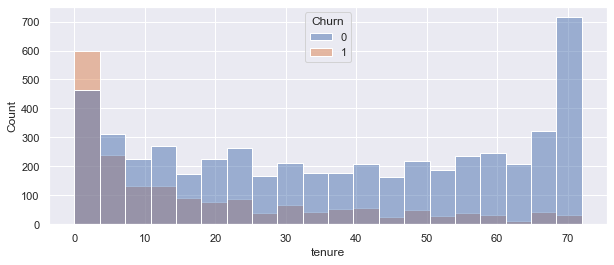

In [48]:
a1 = train_data[['tenure']]
a2 = train_data[['Churn']]
plotting = pd.concat([a1, a2], axis=1)
sns.set(rc={'figure.figsize':(10,4)})
sns.histplot(data=train_data,x='tenure',hue='Churn', bins=20)

* Customers with less tenure (upto 5 to 10 months) tend to Churn more than long term customers.
* Customers who have long term subscription are loyal to the company.

<AxesSubplot:xlabel='Contract', ylabel='count'>

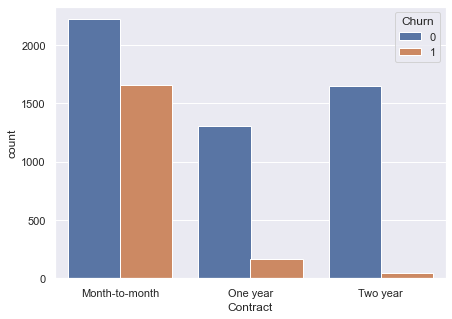

In [49]:
a1 = ohe_data[['Contract']]
a2 = train_data[['Churn']]
plotting = pd.concat([a1, a2], axis=1)
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=plotting,x='Contract',hue='Churn')

* The churn rate is more in customers who take month-to-month contracts.
* Customers who take one or two year contracts churn less implying they renew the contract every time.

## EDA Summary

* We can say that the correlation between Churn and MonthlyCharges is 0.19 indicating there is weak positive relationship between these variables. If there is a unit increase in MonthlyCharges, there is 19% increase in the churn rate.
* Correlation between tenure and churn is -0.35, indicating weak negative relationship. Decrease in the tenure leads to loss of customers by 35%.
* Total Charges and Tenure have a strong positive correlation (0.83) meaning increasing the tenure will increase the cost also.
* The customer churn rate is less in comparison with the customers who stay
* From above plot, we can interpret that there isn't much variation in the data. 'gender' does not have any significant relationship with the churn rate.
* The percentage of customers who are senior citizens is very less compared to youth subscripton.
* The customers with partners tend to churn more than the customers who have dependents.
* Customers who do not have any partners churn more when compared to those who have partners.
* Customers with less tenure (upto 5 to 10 months) tend to Churn more than long term customers.
* Customers who have long term subscription are loyal to the company.
* The churn rate is more in customers who take month-to-month contracts.
* Customers who take one or two year contracts churn less implying they renew the contract every time.

# Predictive Modelling

In [50]:
# Taking x,y values from data frame
y = train_data['Churn'].values
X = train_data.drop('Churn',axis=1)

# Scaling using MinMaxScalar
scaled = MinMaxScaler(feature_range=(0,1))
X_scaled = scaled.fit_transform(X)

In [51]:
# Splitting train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)

### Define a function to build differrent models

In [52]:
#Remove the nested array/List and convert into flat list to map with each feature for logistic regression
def nestedList(l):
    output=[]
    for i in l:
        for j in i:
#             print(j)
            output.append(j)
    return output

In [79]:
model_dict = {"logistic regression": LogisticRegression(solver='liblinear', random_state=70),
             "random forest": RandomForestClassifier(n_estimators=80,random_state=36),
             'xgboost': XGBClassifier(),
             "svc": SVC(kernel='linear'),
             'decision tree': DecisionTreeClassifier(random_state=38)}

def build_classification_models(model_name):
    global Important_features
    model = model_dict.get(model_name)
    model = model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    if model_name != 'svc':
        AUC = model.predict_proba(X_test)
        ROC_AUC_Score = round(metrics.roc_auc_score(y_test,AUC[:,1]), 3)
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
        
        # Finding important features from data using Logistic Regression model
        if model_name == 'logistic regression':
            important = model.coef_
            output = nestedList(important)
        else:
            important = model.feature_importances_
            
        Features_important={}
        featureNames = X.columns.values
        if model_name != 'decision tree':
            if model_name == 'logistic regression':
                for i in range(len(output)):
                    Features_important[featureNames[i]]=output[i]
            else:
                for i in range(len(important)):
                    Features_important[featureNames[i]]=important[i]
            
            Important_features = dict(sorted(Features_important.items(),key= lambda x:x[1],reverse=True))
        else:
            pass
    else:
        report = classification_report(y_test,y_pred)
        
    
    #kfold cross vallidation
    kfold = KFold(n_splits=5)
    cv = cross_val_score(model,X_scaled,y,cv=kfold)
    
    if model_name != 'svc':
        return accuracy, ROC_AUC_Score, fpr, tpr, cv, Important_features
    else:
        return accuracy, cv, report

#### Logistic Regression model

In [80]:
acc_lr, roc_lr, fpr_lr, tpr_lr, cv_score_lr, ImpFeatures_lr = build_classification_models("logistic regression")

In [81]:
print(f"Accuracy of the Logistic Regression model: {round(acc_lr*100, 2)}%")
print(f"ROC score of the Logistic Regression model: {round(roc_lr*100, 2)}%")
print(f"Cross validation accuracy of the Logistic Regression model: {round(max(cv_score_lr)*100, 2)}%")

Accuracy of the Logistic Regression model: 79.13%
ROC score of the Logistic Regression model: 84.0%
Cross validation accuracy of the Logistic Regression model: 81.05%


#### Random Forest model

In [82]:
acc_rf, roc_rf, fpr_rf, tpr_rf, cv_score_rf, ImpFeatures_rf = build_classification_models("random forest")

In [83]:
print(f"Accuracy of the Random Forest model: {round(acc_rf*100, 2)}%")
print(f"ROC score of the Random Forest model: {round(roc_rf*100, 2)}%")
print(f"Cross validation accuracy of the Random Forest model: {round(max(cv_score_rf)*100, 2)}%")

Accuracy of the Random Forest model: 77.93%
ROC score of the Random Forest model: 81.1%
Cross validation accuracy of the Random Forest model: 80.27%


In [156]:
ImpFeatures

{'TotalCharges': 0.16100207333227043,
 'tenure': 0.14001689476098028,
 'MonthlyCharges': 0.13825595888216766,
 'Contract_Month-to-month': 0.052527299568231135,
 'PaymentMethod_Electronic check': 0.03451769702597077,
 'TechSupport_No': 0.032214341380396236,
 'InternetService_Fiber optic': 0.026199846362320173,
 'SeniorCitizen': 0.01997958465743559,
 'OnlineBackup_No': 0.01900087002549261,
 'gender_Female': 0.01858391676737419,
 'gender_Male': 0.018540743961542202,
 'OnlineSecurity_No': 0.017977995644449678,
 'Contract_Two year': 0.01726058360873649,
 'DeviceProtection_No': 0.016335468925144696,
 'PaperlessBilling_No': 0.015744566030641526,
 'PaperlessBilling_Yes': 0.01543712665682645,
 'Partner_Yes': 0.014412215275896112,
 'Partner_No': 0.013983634411532064,
 'OnlineSecurity_Yes': 0.01389456314577622,
 'MultipleLines_No': 0.013809185614823147,
 'OnlineBackup_Yes': 0.01347737342785556,
 'TechSupport_Yes': 0.013149580270857952,
 'MultipleLines_Yes': 0.01292589834599046,
 'Dependents_Yes':

#### XGBoost model

In [64]:
acc_xgb, roc_xgb, fpr_xgb, tpr_xgb, cv_score_xgb, ImpFeatures_xgb = build_classification_models("xgboost")

[18:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:55:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:55:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [65]:
print(f"Accuracy of the XGBoost model: {round(acc_xgb*100, 2)}%")
print(f"ROC score of the XGBoost model: {round(roc_xgb*100, 2)}%")
print(f"Cross validation accuracy of the XGBoost model: {round(max(cv_score_xgb)*100, 2)}%")

Accuracy of the XGBoost model: 77.36%
ROC score of the XGBoost model: 81.9%
Cross validation accuracy of the XGBoost model: 80.06%


In [182]:
ImpFeatures

{'Contract_Month-to-month': 0.34094757,
 'InternetService_Fiber optic': 0.20753366,
 'TechSupport_No': 0.046121493,
 'InternetService_DSL': 0.04346475,
 'Contract_Two year': 0.029528473,
 'StreamingMovies_Yes': 0.025792746,
 'OnlineSecurity_No': 0.023979079,
 'PhoneService_No': 0.020608312,
 'tenure': 0.017580971,
 'PaymentMethod_Electronic check': 0.015966233,
 'Contract_One year': 0.015834153,
 'OnlineBackup_No': 0.015376135,
 'MultipleLines_No': 0.015149383,
 'StreamingMovies_No': 0.013685322,
 'PaperlessBilling_No': 0.012462465,
 'PaymentMethod_Bank transfer (automatic)': 0.011144167,
 'TotalCharges': 0.011041314,
 'SeniorCitizen': 0.010942974,
 'MonthlyCharges': 0.010671263,
 'Dependents_No': 0.010220718,
 'DeviceProtection_Yes': 0.009633632,
 'gender_Female': 0.009484653,
 'OnlineBackup_Yes': 0.00936046,
 'PaymentMethod_Credit card (automatic)': 0.009224787,
 'Partner_No': 0.008637876,
 'DeviceProtection_No': 0.00862005,
 'StreamingTV_No': 0.00841627,
 'TechSupport_Yes': 0.008071

#### SVM model

In [71]:
acc_svc, cv_score_svc, classification_Report_svc = build_classification_models("svc")

In [73]:
print(f"Accuracy of the SVC model: {round(acc_svc*100, 2)}%")
print(f"Cross validation accuracy of the SVC model: {round(max(cv_score_svc)*100, 2)}% \n")
print(classification_Report_svc)

Accuracy of the SVC model: 78.71%
Cross validation accuracy of the SVC model: 81.48% 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1001
           1       0.67      0.52      0.58       408

    accuracy                           0.79      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



#### Decision Tree model

In [84]:
acc_dt, roc_dt, fpr_dt, tpr_dt, cv_score_dt, ImpFeatures_dt = build_classification_models("decision tree")

In [85]:
print(f"Accuracy of the Decision tree model: {round(acc_dt*100, 2)}%")
print(f"ROC score of the Decision tree model: {round(roc_dt*100, 2)}%")
print(f"Cross validation accuracy of the Decision tree model: {round(max(cv_score_dt)*100, 2)}%")

Accuracy of the Decision tree model: 72.53%
ROC score of the Decision tree model: 65.9%
Cross validation accuracy of the Decision tree model: 74.36%


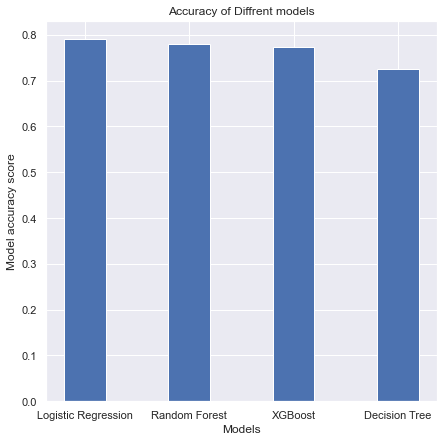

In [117]:
data = {'Logistic Regression':acc_lr,'Random Forest':acc_rf,'XGBoost':acc_xgb,'Decision Tree':acc_dt}
# print(data)
Models = list(data.keys())
Score = list(data.values())

fig = plt.figure(figsize=(7,7))
plt.bar(Models,Score,width=0.4)
plt.xlabel("Models")
plt.ylabel("Model accuracy score")
plt.title("Accuracy of Diffrent models")
plt.show()

Text(0, 0.5, 'True Positive Rate')

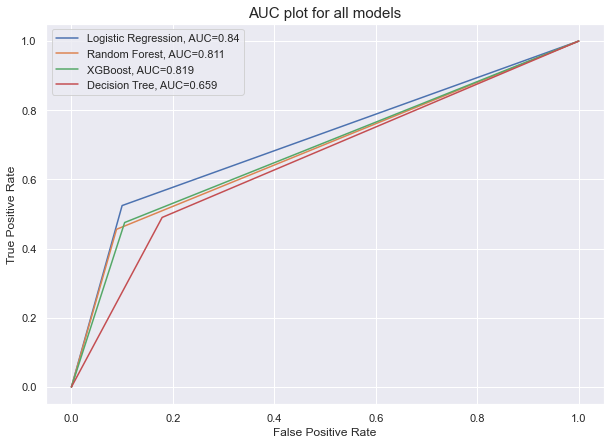

In [107]:
plt.figure(figsize=(10,7)).clf()

plt.plot(fpr_lr,tpr_lr,label="Logistic Regression, AUC="+str(roc_lr))
plt.plot(fpr_rf,tpr_rf,label="Random Forest, AUC="+str(roc_rf))
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, AUC="+str(roc_xgb))
plt.plot(fpr_dt,tpr_dt,label="Decision Tree, AUC="+str(roc_dt))

plt.legend()
plt.title("AUC plot for all models", fontdict={'fontsize': 15})
plt.xlabel("False Positive Rate", fontdict={'fontsize': 12})
plt.ylabel("True Positive Rate", fontdict={'fontsize': 12})

#### From the above bar and AUC graphs
* We can intrepret that the logistic regression model has the highest accuracy and AUC score for this dataset.
* Hyperparameter tuning for the XGBoost might help in improving its performance.

### Random Search for Different Models

In [266]:
spaces = {'LR_space': {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
               'penalty': ['none', 'l1', 'l2', 'elasticnet'],
               'random_state': [70, ]},
         'RF_space': {'n_estimators': [20, 40, 60, 80],
                      'random_state': [36, ]},
         'XGB_space': {'max_depth': [1, 3, 5],
                      'n_estimators': [50, 100],
                      'random_state': [70, ]},
         'SVC_space': {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                      'C': [0.1, 0.2, 0.5],
                      'random_state': [70, ]},
         'DT_space': {'random_state': [70, ]}}

def RandomSearch(model_name, hyperparameter_space):
    model = model_dict.get(model_name)
    search_space = spaces.get(hyperparameter_space)
#     print(search_space.get('random_state')[0])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=search_space.get('random_state')[0])
    
    random_search = RandomizedSearchCV(model, 
                            search_space, 
                            n_iter=500, 
                            scoring='accuracy', 
                            n_jobs=-1, 
                            cv=cv, 
                            random_state=search_space.get('random_state')[0])
    
    result = random_search.fit(X, y)
    best_score = result.best_score_
    best_params = result.best_params_
    
    print(f'Best Score for {model_name} : {round(result.best_score_*100, 2)}%')
    print(f'Best Hyperparameters for {model_name}: {result.best_params_}')
    
    return best_score, best_params

In [267]:
bestscore, bestparams = RandomSearch('logistic regression', 'LR_space')

Best Score for logistic regression : 80.42%
Best Hyperparameters for logistic regression: {'solver': 'newton-cg', 'random_state': 70, 'penalty': 'none'}


In [268]:
bestscore, bestparams = RandomSearch('random forest', 'RF_space')

Best Score for random forest : 78.93%
Best Hyperparameters for random forest: {'random_state': 36, 'n_estimators': 80}


In [269]:
bestscore, bestparams = RandomSearch('xgboost', 'XGB_space')

[20:38:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Score for xgboost : 80.51%
Best Hyperparameters for xgboost: {'random_state': 70, 'n_estimators': 100, 'max_depth': 1}
